# Gradient Descent 1D

### Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython import display as dp
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

### Defining The Function



In [ ]:
# Defining the function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# Derivative function
def deriv(x):
  return 6*x - 3

# g(x)
x = sym.Symbol('x')
gx_sym = 3*x**2 - 3*sym.cos((sym.pi)*x)
dgx_sym = sym.diff(gx_sym, x)

# h(x)
hx_sym = sym.sin(x)*sym.exp(-x**2*0.05)   # Function h(x)
dhx_sym = sym.diff(hx_sym,x)

dp.display(gx_sym, dgx_sym, hx_sym, dhx_sym)

gx = sym.lambdify(x, gx_sym, 'numpy')
dgx = sym.lambdify(x, dgx_sym, 'numpy')
hx = sym.lambdify(x, hx_sym, 'numpy')
dhx = sym.lambdify(x, dhx_sym, 'numpy')

3*x**2 - 3*cos(pi*x)

6*x + 3*pi*sin(pi*x)

exp(-0.05*x**2)*sin(x)

-0.1*x*exp(-0.05*x**2)*sin(x) + exp(-0.05*x**2)*cos(x)

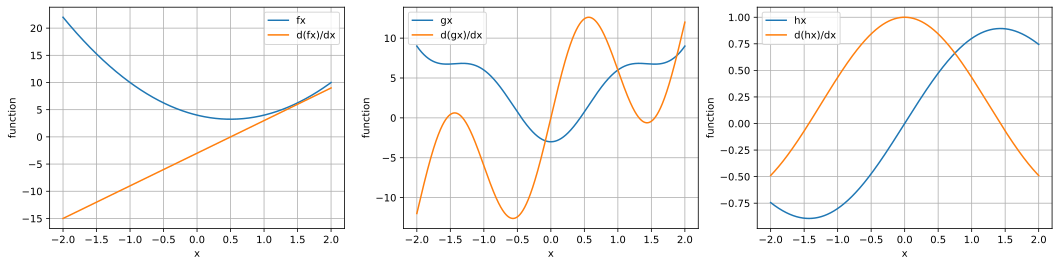

In [ ]:
# Plotting the function and its derivatives

# Defining the domain:
x = np.linspace(-2, 2, 2001)
functions = np.array([
    [fx, deriv, 'fx'],
    [gx,dgx, 'gx'],
    [hx, dhx, 'hx']
], dtype=object)

fig, ax = plt.subplots(1, 3, figsize=(18, 4))
# Plotting
for i in range(3):
  ax[i].plot(x, functions[i,0](x), x, functions[i,1](x))
  ax[i].set_xlabel('x')
  ax[i].set_ylabel('function')
  ax[i].legend([functions[i,2], f"d({functions[i,2]})/dx"])
  ax[i].grid()

### Learning Algorithm Parameters

In [ ]:
# Starting Point
localmin = np.random.choice(x,1)    # From vector x, randomly choose 1 value
print('First Estimate: ', localmin)

# learning parameters
training_epochs = 250         # Training epochs
learning_rate = .01           # Small learning steps
lr = learning_rate
grad = 10                     # random initial deriv value

First Estimate:  [-1.842]


### Learning Algorithm

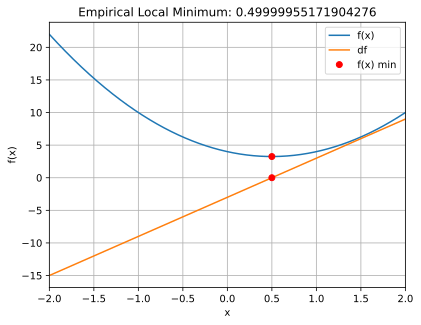

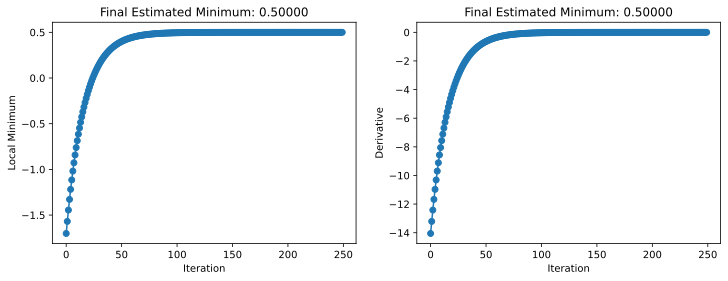

In [ ]:
# Run through the typical GD training and store all results:
modelparams = np.zeros((training_epochs,2))
for j in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - lr*grad
  modelparams[j,0] = localmin[0]
  modelparams[j,1] = grad[0]

# Plotting the results

plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, fx(localmin), 'ro')
plt.plot(localmin, deriv(localmin), 'ro')
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical Local Minimum: %s'%localmin[0])
plt.show()

# Plot the gradient over iterations

fig, ax = plt.subplots(1,2, figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i], 'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final Estimated Minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('Derivative')

plt.show()

# The smaller the training rate the higher the number of epochs needed to reach
# the local minima

### Using Step & Exponential Decay

Using a mixed approach between Steps and smooth Exponential decay

Number of iterations for: fx  is:  325
Number of iterations for: gx  is:  45
Number of iterations for: hx  is:  2500


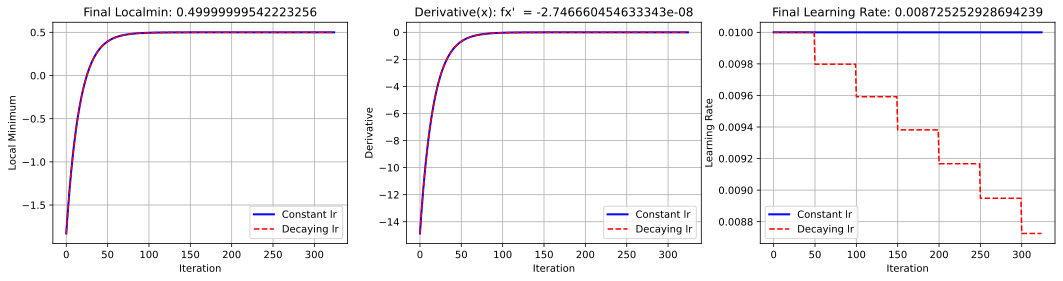

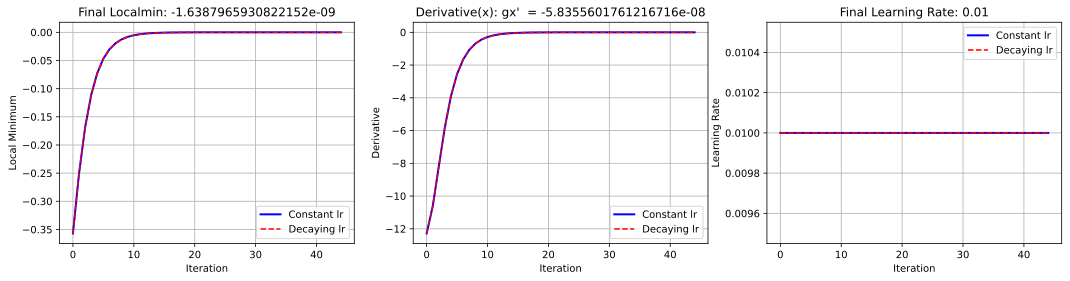

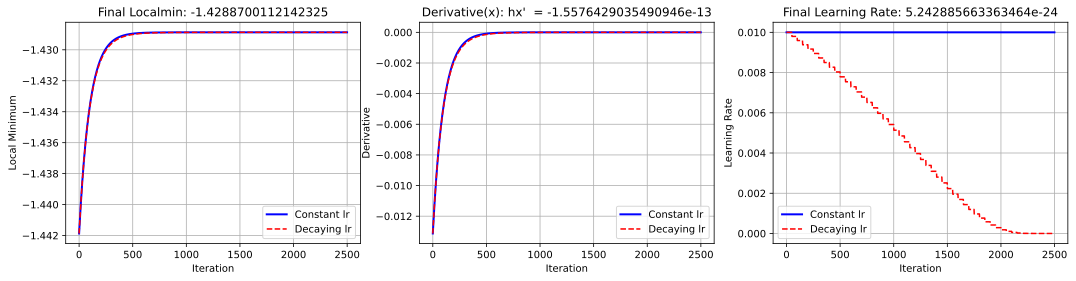

In [ ]:
for i in range(3):
  deriv = functions[i,1]
  # Run through training and store all results:
  localmin = np.random.choice(x,1)    # From vector x, randomly choose 1 value
  loc_dec = localmin.copy()
  loc_cons = localmin.copy()
  grad = 10                     # random initial deriv value

  lr_var = lr             # Initializing variable learning rate
  grad_cons = grad
  grad_dec = grad

  # Initialize modelparams as a list to dynamically store results
  modelparams_list_dec = []
  modelparams_list_cons = []
  j = 0
  while max(abs(grad_cons), abs(grad_dec)) >= 0.0000001:
    grad_cons = deriv(loc_cons)
    grad_dec = deriv(loc_dec)
    loc_cons = loc_cons - lr*grad_cons
    loc_dec = loc_dec - lr_var*grad_dec

    # Appending to the parameters list
    modelparams_list_cons.append([float(loc_cons[0]), float(grad_cons[0]), float(learning_rate)])
    modelparams_list_dec.append([float(loc_dec[0]), float(grad_dec[0]), float(lr_var)])
    j+=1
    if j>0 and j%50 == 0 and j <10*training_epochs:
      lr_var = learning_rate*np.exp(-j/(10*training_epochs-j))

    if j == 10*training_epochs:
      break

  # Convert the list to a NumPy array after the loop for subsequent plotting
  modelparams_dec_exp1 = np.array(modelparams_list_dec)
  modelparams_cons1 = np.array(modelparams_list_cons)

  # Plot the gradient over iterations

  fig, ax = plt.subplots(1, 3, figsize=(18, 4))
  # Left plot: parameter trajectory
  ax[0].plot(modelparams_cons1[:, 0], 'b-', linewidth=2, label='Constant lr')
  ax[0].plot(modelparams_dec_exp1[:, 0], 'r--', linewidth=1.5, label='Decaying lr')
  ax[0].set_xlabel('Iteration')
  ax[0].set_ylabel('Local Minimum')
  ax[0].legend()
  ax[0].set_title(f'Final Localmin: {loc_cons[0]}')
  ax[0].grid()

  # Middle plot: derivative
  ax[1].plot(modelparams_cons1[:, 1], 'b-', linewidth=2, label='Constant lr')
  ax[1].plot(modelparams_dec_exp1[:, 1], 'r--', linewidth=1.5, label='Decaying lr')
  ax[1].set_xlabel('Iteration')
  ax[1].set_ylabel('Derivative')
  ax[1].legend()
  ax[1].set_title(f'Derivative(x): {functions[i,2]}\'  = {deriv(loc_cons[0])}')
  ax[1].grid()

  # Right plot: Learning Rate
  ax[2].plot(modelparams_cons1[:, 2], 'b-', linewidth=2, label='Constant lr')
  ax[2].plot(modelparams_dec_exp1[:, 2], 'r--', linewidth=1.5, label='Decaying lr')
  ax[2].set_xlabel('Iteration')
  ax[2].set_ylabel('Learning Rate')
  ax[2].legend()
  ax[2].set_title(f'Final Learning Rate: {lr_var}')
  ax[2].grid()

  print('Number of iterations for:', functions[i,2],' is: ', len(modelparams_list_cons))

### Gradient Based Learning Rate

/tmp/ipython-input-1261350829.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lr_var = min(float(lr_var * np.abs(grad_dec)), 2 * lr_var)  # cap at 2*lr
/tmp/ipython-input-1261350829.py:22: RuntimeWarning: overflow encountered in multiply
  loc_dec = loc_dec - lr_var*grad_dec
/tmp/ipython-input-1261350829.py:29: RuntimeWarning: overflow encountered in multiply
  lr_var = min(float(lr_var * np.abs(grad_dec)), 2 * lr_var)  # cap at 2*lr
<lambdifygenerated-56>:2: RuntimeWarning: invalid value encountered in sin
  return 6*x + 3*pi*sin(pi*x)


Number of iterations for: fx  is:  250
Number of iterations for: gx  is:  54
Number of iterations for: hx  is:  250


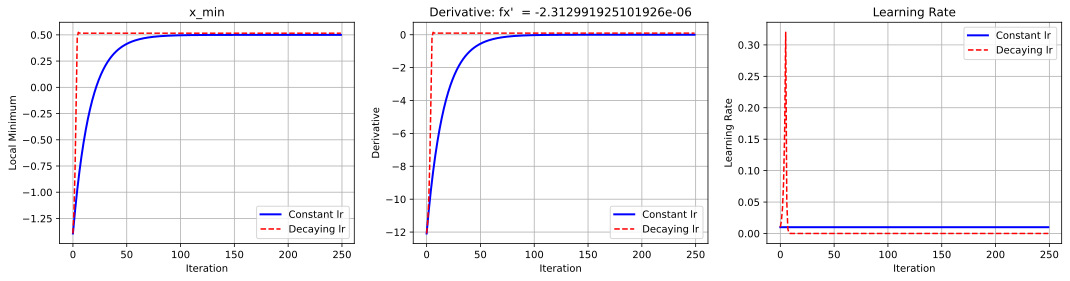

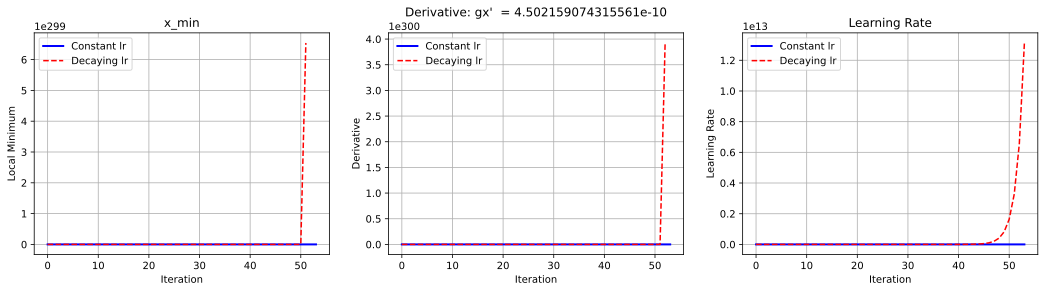

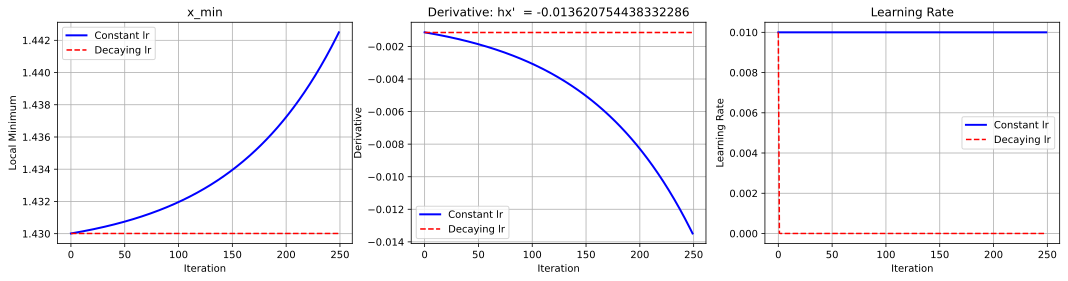

In [ ]:
for i in range(3):
  deriv = functions[i,1]
  # Run through training and store all results:
  localmin = np.random.choice(x,1)    # From vector x, randomly choose 1 value
  loc_dec = localmin.copy()
  loc_cons = localmin.copy()

  lr_var = 0.01               # Initializing variable learning rate
  grad = 10
  grad_cons = grad
  grad_dec = grad

  # Initialize modelparams as a list to dynamically store results
  modelparams_list_dec = []
  modelparams_list_cons = []

  j = 0
  for j in range(training_epochs):
    grad_cons = deriv(loc_cons)
    grad_dec = deriv(loc_dec)
    loc_cons = loc_cons - lr*grad_cons
    loc_dec = loc_dec - lr_var*grad_dec

    # Appending to the parameters list
    modelparams_list_cons.append([float(loc_cons[0]), float(grad_cons[0]), float(learning_rate)])
    modelparams_list_dec.append([float(loc_dec[0]), float(grad_dec[0]), float(lr_var)])

    # Adaptive Learning Rate depending on grad value
    lr_var = min(float(lr_var * np.abs(grad_dec)), 2 * lr_var)  # cap at 2*lr

    if max(abs(grad_cons), abs(grad_dec)) <= 0.0000001:
      break


  # Convert the list to a NumPy array after the loop for subsequent plotting
  modelparams_dec_exp2 = np.array(modelparams_list_dec)
  modelparams_cons2 = np.array(modelparams_list_cons)

  # Plotting the results

  fig, ax = plt.subplots(1, 3, figsize=(18, 4))
  # Left plot: parameter trajectory
  ax[0].plot(modelparams_cons2[:, 0], 'b-', linewidth=2, label='Constant lr')
  ax[0].plot(modelparams_dec_exp2[:, 0], 'r--', linewidth=1.5, label='Decaying lr')
  ax[0].set_xlabel('Iteration')
  ax[0].set_ylabel('Local Minimum')
  ax[0].legend()
  ax[0].set_title('x_min')
  ax[0].grid()

  # Middle plot: derivative
  ax[1].plot(modelparams_cons2[:, 1], 'b-', linewidth=2, label='Constant lr')
  ax[1].plot(modelparams_dec_exp2[:, 1], 'r--', linewidth=1.5, label='Decaying lr')
  ax[1].set_xlabel('Iteration')
  ax[1].set_ylabel('Derivative')
  ax[1].set_title(f'Derivative: {functions[i,2]}\'  = {deriv(loc_cons[0])}')
  ax[1].legend()
  ax[1].grid()

  # Right plot: Learning Rate
  ax[2].plot(modelparams_cons2[:, 2], 'b-', linewidth=2, label='Constant lr')
  ax[2].plot(modelparams_dec_exp2[:, 2], 'r--', linewidth=1.5, label='Decaying lr')
  ax[2].set_xlabel('Iteration')
  ax[2].set_ylabel('Learning Rate')
  ax[2].set_title('Learning Rate')
  ax[2].legend()
  ax[2].grid()

  print('Number of iterations for:', functions[i,2],' is: ', len(modelparams_list_cons))

### Time Based Learning Rate

Number of iterations:  250
Number of iterations:  45
Number of iterations:  250


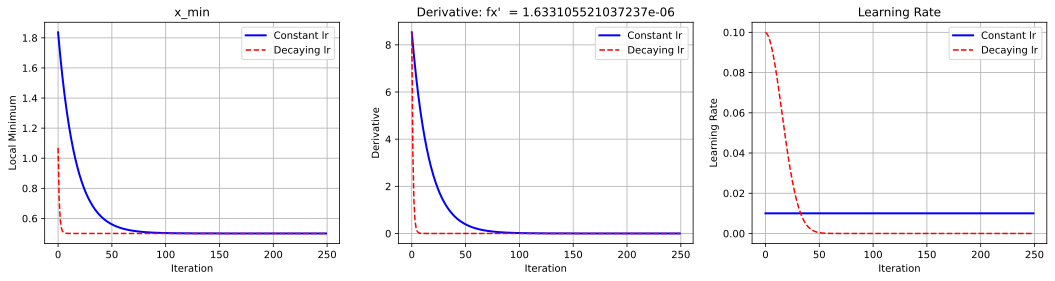

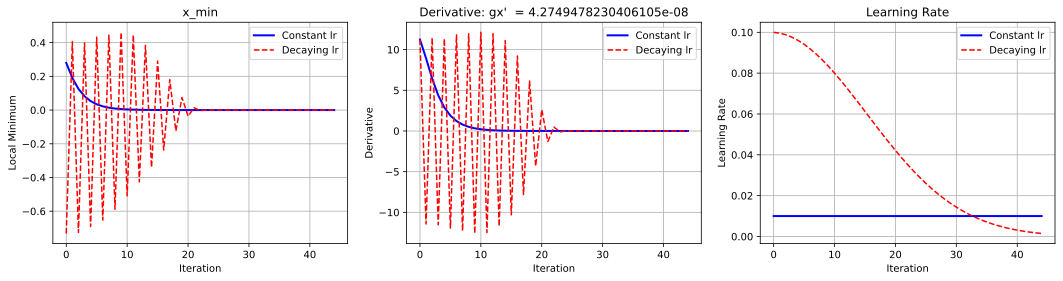

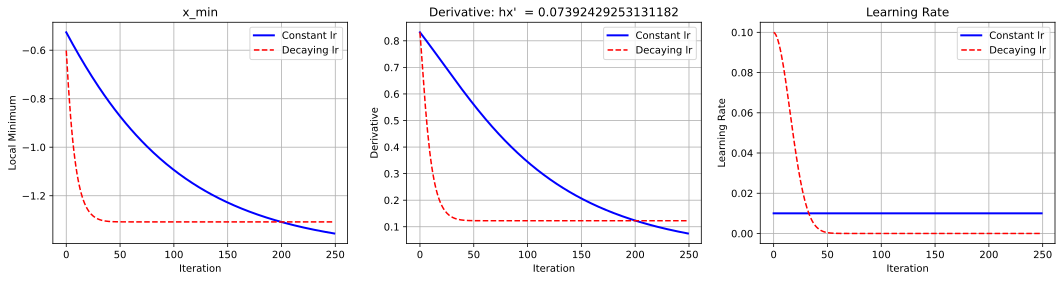

In [ ]:
for i in range(3):
  deriv = functions[i,1]
  # Run through training and store all results:
  localmin = np.random.choice(x,1)    # From vector x, randomly choose 1 value
  loc_dec = localmin.copy()
  loc_cons = localmin.copy()

  lr_var = 0.1                        # Initializing variable learning rate
  grad = 10
  grad_cons = grad
  grad_dec = grad

  # Initialize modelparams as a list to dynamically store results
  modelparams_list_dec = []
  modelparams_list_cons = []

  j = 0
  for j in range(training_epochs):
    grad_cons = deriv(loc_cons)
    grad_dec = deriv(loc_dec)
    loc_cons = loc_cons - lr*grad_cons
    loc_dec = loc_dec - lr_var*grad_dec

    # Appending to the parameters list
    modelparams_list_cons.append([float(loc_cons[0]), float(grad_cons[0]), float(learning_rate)])
    modelparams_list_dec.append([float(loc_dec[0]), float(grad_dec[0]), float(lr_var)])

    # Adaptive Learning Rate depending on iteration
    lr_var = lr_var*(1-(j+1)/training_epochs)

    if max(abs(grad_cons), abs(grad_dec)) <= 0.0000001:
      break


  # Convert the list to a NumPy array after the loop for subsequent plotting
  modelparams_dec_exp3 = np.array(modelparams_list_dec)
  modelparams_cons3 = np.array(modelparams_list_cons)

  # Plotting the results

  fig, ax = plt.subplots(1, 3, figsize=(18, 4))
  # Left plot: parameter trajectory
  ax[0].plot(modelparams_cons3[:, 0], 'b-', linewidth=2, label='Constant lr')
  ax[0].plot(modelparams_dec_exp3[:, 0], 'r--', linewidth=1.5, label='Decaying lr')
  ax[0].set_xlabel('Iteration')
  ax[0].set_ylabel('Local Minimum')
  ax[0].legend()
  ax[0].set_title('x_min')
  ax[0].grid()

  # Middle plot: derivative
  ax[1].plot(modelparams_cons3[:, 1], 'b-', linewidth=2, label='Constant lr')
  ax[1].plot(modelparams_dec_exp3[:, 1], 'r--', linewidth=1.5, label='Decaying lr')
  ax[1].set_xlabel('Iteration')
  ax[1].set_ylabel('Derivative')
  ax[1].set_title(f'Derivative: {functions[i,2]}\'  = {deriv(loc_cons[0])}')
  ax[1].legend()
  ax[1].grid()

  # Right plot: Learning Rate
  ax[2].plot(modelparams_cons3[:, 2], 'b-', linewidth=2, label='Constant lr')
  ax[2].plot(modelparams_dec_exp3[:, 2], 'r--', linewidth=1.5, label='Decaying lr')
  ax[2].set_xlabel('Iteration')
  ax[2].set_ylabel('Learning Rate')
  ax[2].set_title('Learning Rate')
  ax[2].legend()
  ax[2].grid()

  print('Number of iterations: ', len(modelparams_list_cons))

### Comparing All Experiments

/tmp/ipython-input-955282621.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lr_var2 = min(float(lr * np.abs(grad_dec2)), 2 * lr)  # cap at 2*lr


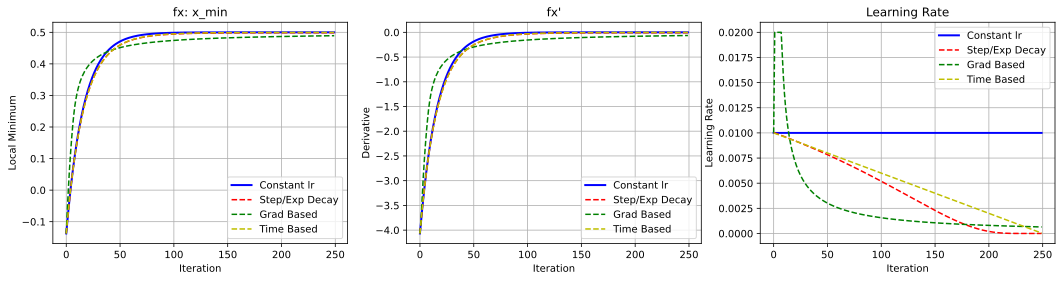

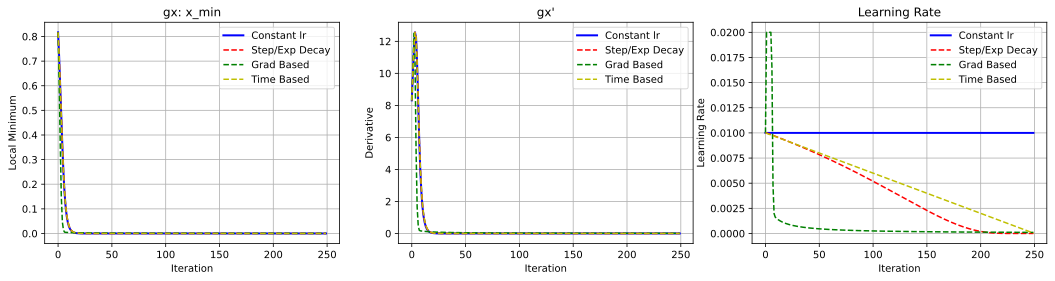

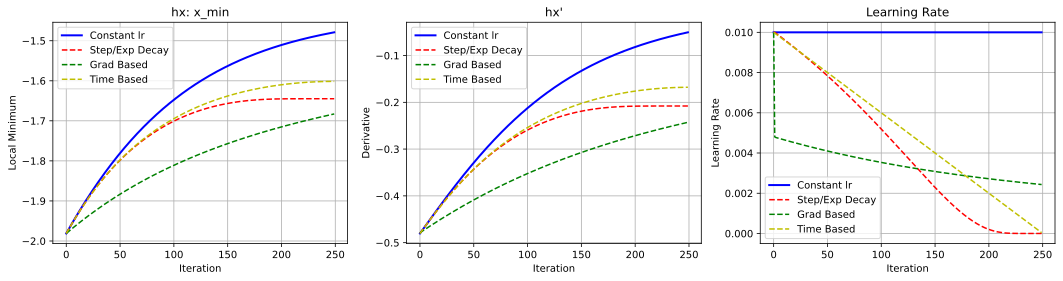

In [ ]:
for i in range(3):
  # Run through training and store all results for fx:

  localmin = np.random.choice(x,1)    # From vector x, randomly choose 1 value
  loc_dec1 = localmin.copy()
  loc_dec2 = localmin.copy()
  loc_dec3 = localmin.copy()
  loc_cons = localmin.copy()

  deriv = functions[i,1]

  lr = learning_rate        # Initializing variable learning rate
  lr_var1 = learning_rate
  lr_var2 = learning_rate
  lr_var3 = learning_rate

  grad = 10
  grad_cons = grad
  grad_dec1 = grad
  grad_dec2 = grad
  grad_dec3 = grad



  # Initialize modelparams as a list to dynamically store results
  modelparams_list_dec1 = []
  modelparams_list_dec2 = []
  modelparams_list_dec3 = []
  modelparams_list_cons = []

  j = 0
  for j in range(training_epochs):
    grad_cons = deriv(loc_cons)
    grad_dec1 = deriv(loc_dec1)
    grad_dec2 = deriv(loc_dec2)
    grad_dec3 = deriv(loc_dec3)
    loc_cons = loc_cons - lr*grad_cons
    loc_dec1 = loc_dec1 - lr_var1*grad_dec1
    loc_dec2 = loc_dec2 - lr_var2*grad_dec2
    loc_dec3 = loc_dec3 - lr_var3*grad_dec3

    # Appending to the parameters list
    modelparams_list_cons.append([float(loc_cons[0]), float(grad_cons[0]), float(learning_rate)])
    modelparams_list_dec1.append([float(loc_dec1[0]), float(grad_dec1[0]), float(lr_var1)])
    modelparams_list_dec2.append([float(loc_dec2[0]), float(grad_dec2[0]), float(lr_var2)])
    modelparams_list_dec3.append([float(loc_dec3[0]), float(grad_dec3[0]), float(lr_var3)])


    # Adaptive Learning Rate depending on iteration
    lr_var1 = lr*np.exp(-j/(training_epochs-j))
    lr_var2 = min(float(lr * np.abs(grad_dec2)), 2 * lr)  # cap at 2*lr
    lr_var3 = lr*(1-(j+1)/training_epochs)

    if max(abs(grad_cons), abs(grad_dec1), abs(grad_dec2), abs(grad_dec3)) <= 0.0000001:
      break


  # Convert the list to a NumPy array after the loop for subsequent plotting
  modelparams_dec_exp1 = np.array(modelparams_list_dec1)
  modelparams_dec_exp2 = np.array(modelparams_list_dec2)
  modelparams_dec_exp3 = np.array(modelparams_list_dec3)
  modelparams_cons = np.array(modelparams_list_cons)

  fig, ax = plt.subplots(1, 3, figsize=(18, 4))
  # Left plot: local min trajectory
  ax[0].plot(modelparams_cons[:, 0], 'b-', linewidth=2, label='Constant lr')
  ax[0].plot(modelparams_dec_exp1[:, 0], 'r--', linewidth=1.5, label='Step/Exp Decay')
  ax[0].plot(modelparams_dec_exp2[:, 0], 'g--', linewidth=1.5, label='Grad Based')
  ax[0].plot(modelparams_dec_exp3[:, 0], 'y--',linewidth=1.5, label='Time Based')
  ax[0].set_xlabel('Iteration')
  ax[0].set_ylabel('Local Minimum')
  ax[0].legend()
  ax[0].set_title(f'{functions[i,2]}: x_min')
  ax[0].grid()

  # Middle plot: derivative
  ax[1].plot(modelparams_cons[:, 1], 'b-', linewidth=2, label='Constant lr')
  ax[1].plot(modelparams_dec_exp1[:, 1], 'r--', linewidth=1.5, label='Step/Exp Decay')
  ax[1].plot(modelparams_dec_exp2[:, 1], 'g--', linewidth=1.5, label='Grad Based')
  ax[1].plot(modelparams_dec_exp3[:, 1], 'y--',linewidth=1.5, label='Time Based')
  ax[1].set_xlabel('Iteration')
  ax[1].set_ylabel('Derivative')
  ax[1].set_title(f'{functions[i,2]}\'')
  ax[1].legend()
  ax[1].grid()

  # Right plot: Learning Rate
  ax[2].plot(modelparams_cons[:, 2], 'b-', linewidth=2, label='Constant lr')
  ax[2].plot(modelparams_dec_exp1[:, 2], 'r--', linewidth=1.5, label='Step/Exp Decay')
  ax[2].plot(modelparams_dec_exp2[:, 2], 'g--', linewidth=1.5, label='Grad Based')
  ax[2].plot(modelparams_dec_exp3[:, 2], 'y--',linewidth=1.5, label='Time Based')
  ax[2].set_xlabel('Iteration')
  ax[2].set_ylabel('Learning Rate')
  ax[2].set_title('Learning Rate')
  ax[2].legend()
  ax[2].grid()